In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

About the dataset:

The dataset contains the patient records collected from a hospital in Greenland.

For binary variables: 1 = true and 0 = false.

**Target**

The "Survived_1_year" column is a target variable which has binary entries (0 or 1)

* Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment
* Survived_1_year == 1, implies that the patient survived after 1 year of treatment

**Features**

* ID_Patient_Care_Situation: Care situation of a patient during treatment

* Diagnosed_Condition: The diagnosed condition of the patient

* ID_Patient: Patient identifier number

* Treatment_with_drugs: Class of drugs used during treatment

* Patient_Age: Age of the patient

* Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.

* Patient_Smoker: If the patient was a smoker or not

* Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country

* Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

# Loading of Data

In [ ]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [ ]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


The columns are renamed for better visualization

In [ ]:
pharma_data.columns = ['care_situation', 'diagnosed', 'ID', 'drug_class', 'age', 'bmi', 'smoker', 'residence', 'mental_condition', 'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'prev_cond', 'survived']
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   care_situation    23097 non-null  int64  
 1   diagnosed         23097 non-null  int64  
 2   ID                23097 non-null  int64  
 3   drug_class        23084 non-null  object 
 4   age               23097 non-null  int64  
 5   bmi               23097 non-null  float64
 6   smoker            23097 non-null  object 
 7   residence         23097 non-null  object 
 8   mental_condition  23097 non-null  object 
 9   A                 21862 non-null  float64
 10  B                 21862 non-null  float64
 11  C                 21862 non-null  float64
 12  D                 21862 non-null  float64
 13  E                 21862 non-null  float64
 14  F                 21862 non-null  float64
 15  Z                 21862 non-null  float64
 16  prev_cond         21862 non-null  float6

In [ ]:
pharma_data.head()

,care_situation,diagnosed,ID,drug_class,age,bmi,smoker,residence,mental_condition,A,B,C,D,E,F,Z,prev_cond,survived
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [ ]:
# Inspecting the values counts of the categorical columns
cat_cols = ['drug_class', 'smoker', 'residence', 'mental_condition', 'prev_cond','survived']
for cat in cat_cols:
  print(pharma_data[cat].value_counts())

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: drug_class, dtype: int64
NO            13246
YES            9838
C

In [ ]:
pharma_data.describe()

,care_situation,diagnosed,ID,age,bmi,A,B,C,D,E,F,Z,prev_cond,survived
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [ ]:
blu = pharma_data

There are only 23094 values for drug class, which signifies 13 missing values in that column.

In [ ]:
nan_values = pharma_data[pharma_data['drug_class'].isna()]
print(nan_values)

       care_situation  diagnosed     ID drug_class  age     bmi      smoker  \
4               33012          0  12513        NaN  128  1.3484  Cannot say   
218             33008          0  12509        NaN  112  1.2925  Cannot say   
2540            33014          0  12515        NaN  149  1.7784  Cannot say   
2711            33004          0  12505        NaN  123  1.9290  Cannot say   
4308            33001          0  12502        NaN  114  1.6239  Cannot say   
4887            33011          0  12512        NaN  132  1.9896  Cannot say   
6308            33010          0  12511        NaN  142  1.5701  Cannot say   
10388           33006          0  12507        NaN  138  1.3745  Cannot say   
10663           33009          0  12510        NaN  142  1.1450  Cannot say   
12782           33000          0  12501        NaN  112  1.5465  Cannot say   
18630           33005          0  12506        NaN  125  1.2581  Cannot say   
19123           33002          0  12503        NaN  

Further inspection of the NaN values in the drug class column show that this column also corresponds to the smoker column which has only 13 values for 'Cannot say'.

Some strange values were observed in age and bmi columns alongside the NaN in drug class. Here, there are values with bmi of 1.xx with corresponding ages above 100. 

In [ ]:
age_strange = 0
bmi_strange = 0
for i, j in zip(pharma_data.age, pharma_data.bmi):
  if i > 100:
    age_strange+=1
  if j < 15:
    bmi_strange+=1
print(age_strange)
print(bmi_strange)

13
13


The strange values for age and bmi are inspected separately and they both come up as 13. In medical terms, normal bmi ranges from 18.5 to 24.9, so a threshold of 15 is used to check for this. 

In [ ]:
pharma_data.isnull().sum()

care_situation         0
diagnosed              0
ID                     0
drug_class            13
age                    0
bmi                    0
smoker                 0
residence              0
mental_condition       0
A                   1235
B                   1235
C                   1235
D                   1235
E                   1235
F                   1235
Z                   1235
prev_cond           1235
survived               0
dtype: int64

In [ ]:
pharma_data.isnull().sum() * 100 / len(pharma_data)

care_situation      0.000000
diagnosed           0.000000
ID                  0.000000
drug_class          0.056284
age                 0.000000
bmi                 0.000000
smoker              0.000000
residence           0.000000
mental_condition    0.000000
A                   5.347015
B                   5.347015
C                   5.347015
D                   5.347015
E                   5.347015
F                   5.347015
Z                   5.347015
prev_cond           5.347015
survived            0.000000
dtype: float64

In [ ]:
pharma_data[pharma_data.isna().any(axis=1)]

,care_situation,diagnosed,ID,drug_class,age,bmi,smoker,residence,mental_condition,A,B,C,D,E,F,Z,prev_cond,survived
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
27,4691,31,4500,DX2,44,27.935658,YES,URBAN,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
36,4869,28,6826,DX1,4,17.342624,NO,URBAN,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
41,32899,24,7275,DX2 DX5,12,20.994843,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
97,9311,13,7538,DX2,49,26.641499,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23002,6195,3,7812,DX2,26,26.548517,YES,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23012,20220,48,12318,DX4,15,18.849124,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23024,25571,6,3423,DX2,13,24.343030,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23038,644,30,8032,DX3 DX5,45,19.272509,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Inspecting the percentage of missing values in the dataframe shows that the percentage missing values is only about 5%. With the total number of affected rows being 1248; 13 from the drug class column and 1235 in columns (A - prev_cond). These rows with missing values can be dropped.

In [ ]:
blu = pharma_data

In [ ]:
blu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   care_situation    23097 non-null  int64  
 1   diagnosed         23097 non-null  int64  
 2   ID                23097 non-null  int64  
 3   drug_class        23084 non-null  object 
 4   age               23097 non-null  int64  
 5   bmi               23097 non-null  float64
 6   smoker            23097 non-null  object 
 7   residence         23097 non-null  object 
 8   mental_condition  23097 non-null  object 
 9   A                 21862 non-null  float64
 10  B                 21862 non-null  float64
 11  C                 21862 non-null  float64
 12  D                 21862 non-null  float64
 13  E                 21862 non-null  float64
 14  F                 21862 non-null  float64
 15  Z                 21862 non-null  float64
 16  prev_cond         21862 non-null  float6

In [ ]:
blu.head(10)

,care_situation,diagnosed,ID,drug_class,age,bmi,smoker,residence,mental_condition,A,B,C,D,E,F,Z,prev_cond,survived
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
6,5138,52,5296,DX3,53,19.103244,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
7,17265,9,5947,DX5,3,18.126976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
8,24349,47,6585,DX4,62,25.074482,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
9,1647,17,10190,DX6,46,17.663877,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [ ]:
# Dropping NaN rows
blu = blu.dropna()

In [ ]:
blu.head(10)

,care_situation,diagnosed,ID,drug_class,age,bmi,smoker,residence,mental_condition,A,B,C,D,E,F,Z,prev_cond,survived
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
6,5138,52,5296,DX3,53,19.103244,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
7,17265,9,5947,DX5,3,18.126976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
8,24349,47,6585,DX4,62,25.074482,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
9,1647,17,10190,DX6,46,17.663877,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
10,14892,8,9461,DX6,60,18.690567,YES,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0


In [ ]:
blu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21849 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   care_situation    21849 non-null  int64  
 1   diagnosed         21849 non-null  int64  
 2   ID                21849 non-null  int64  
 3   drug_class        21849 non-null  object 
 4   age               21849 non-null  int64  
 5   bmi               21849 non-null  float64
 6   smoker            21849 non-null  object 
 7   residence         21849 non-null  object 
 8   mental_condition  21849 non-null  object 
 9   A                 21849 non-null  float64
 10  B                 21849 non-null  float64
 11  C                 21849 non-null  float64
 12  D                 21849 non-null  float64
 13  E                 21849 non-null  float64
 14  F                 21849 non-null  float64
 15  Z                 21849 non-null  float64
 16  prev_cond         21849 non-null  float6

Inspecting the dataframe, although the entries have reduced after dropping NaN values, the index is still 0 to 23096

In [ ]:
# The resets the index
blu = blu.reset_index(drop=True)

In [ ]:
blu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21849 entries, 0 to 21848
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   care_situation    21849 non-null  int64  
 1   diagnosed         21849 non-null  int64  
 2   ID                21849 non-null  int64  
 3   drug_class        21849 non-null  object 
 4   age               21849 non-null  int64  
 5   bmi               21849 non-null  float64
 6   smoker            21849 non-null  object 
 7   residence         21849 non-null  object 
 8   mental_condition  21849 non-null  object 
 9   A                 21849 non-null  float64
 10  B                 21849 non-null  float64
 11  C                 21849 non-null  float64
 12  D                 21849 non-null  float64
 13  E                 21849 non-null  float64
 14  F                 21849 non-null  float64
 15  Z                 21849 non-null  float64
 16  prev_cond         21849 non-null  float6

Now, the index is 0 to 21848

In [ ]:
blu.head(10)

,care_situation,diagnosed,ID,drug_class,age,bmi,smoker,residence,mental_condition,A,B,C,D,E,F,Z,prev_cond,survived
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
5,5138,52,5296,DX3,53,19.103244,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
6,17265,9,5947,DX5,3,18.126976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
7,24349,47,6585,DX4,62,25.074482,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
8,1647,17,10190,DX6,46,17.663877,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
9,14892,8,9461,DX6,60,18.690567,YES,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0


Now, there are only 21849 rows after NaN values have been dropped.
Next, columns that are not intuitively related to the survival will also be dropped.

# Exploratory Data Analysis (EDA)

In [ ]:
cats = ['smoker', 'residence', 'mental_condition', 'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'prev_cond','survived']
for cat in cats:
  print(blu[cat].value_counts())
  print('')

NO     12519
YES     9330
Name: smoker, dtype: int64

RURAL    15279
URBAN     6570
Name: residence, dtype: int64

Stable    21849
Name: mental_condition, dtype: int64

1.0    19630
0.0     2219
Name: A, dtype: int64

0.0    18868
1.0     2981
Name: B, dtype: int64

0.0    17803
1.0     4046
Name: C, dtype: int64

0.0    20021
1.0     1828
Name: D, dtype: int64

0.0    13252
1.0     8597
Name: E, dtype: int64

0.0    20675
1.0     1174
Name: F, dtype: int64

0.0    21849
Name: Z, dtype: int64

1.0    9373
2.0    9016
3.0    3026
4.0     397
5.0      37
Name: prev_cond, dtype: int64

1    13642
0     8207
Name: survived, dtype: int64



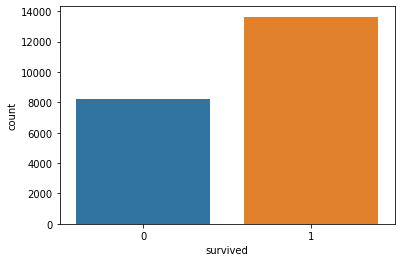

In [ ]:
sns.countplot(x='survived', data=blu);

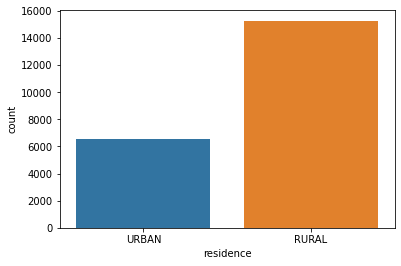

In [ ]:
sns.countplot(x='residence', data=blu);

More of the patients live in rural areas.

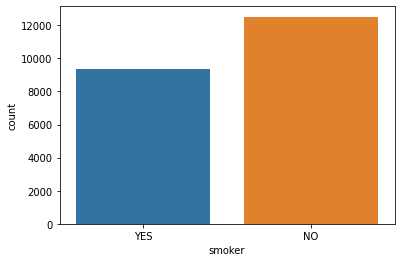

In [ ]:
sns.countplot(x='smoker', data=blu);

There are more non-smoking patients in the dataset

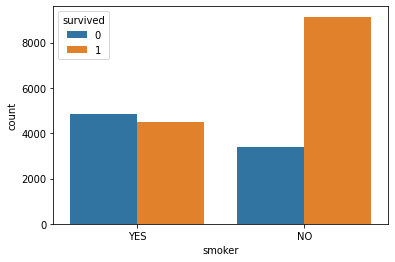

In [ ]:
sns.countplot(x='smoker', data=blu, hue='survived')

The above visualization shows that the amount of patients that survived after one year is higher for non-smoker

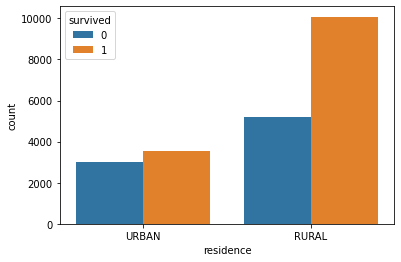

In [ ]:
sns.countplot(x='residence', data=blu, hue='survived')

The above visualization shows that the amount of patients that survived after one year is higher for patients who stayed in the rural part of the country.

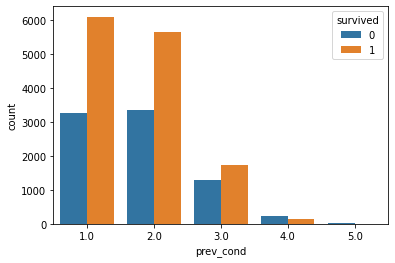

In [ ]:
sns.countplot(x='prev_cond', data=blu, hue='survived')

The above visualization shows that the amount of patients that survived after one year falls as the number of previous condition increases.

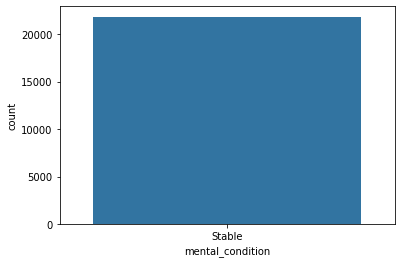

In [ ]:
sns.countplot(x='mental_condition', data=blu);

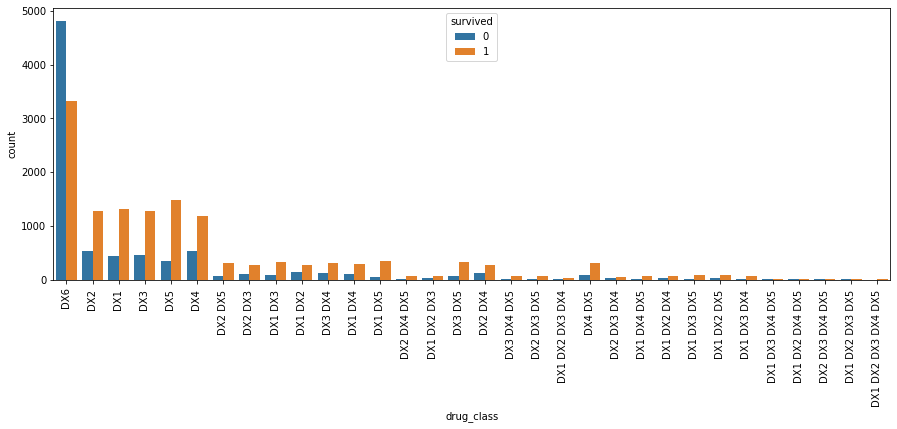

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x='drug_class', data=blu, hue='survived')
plt.xticks(rotation = 90)
plt.show()

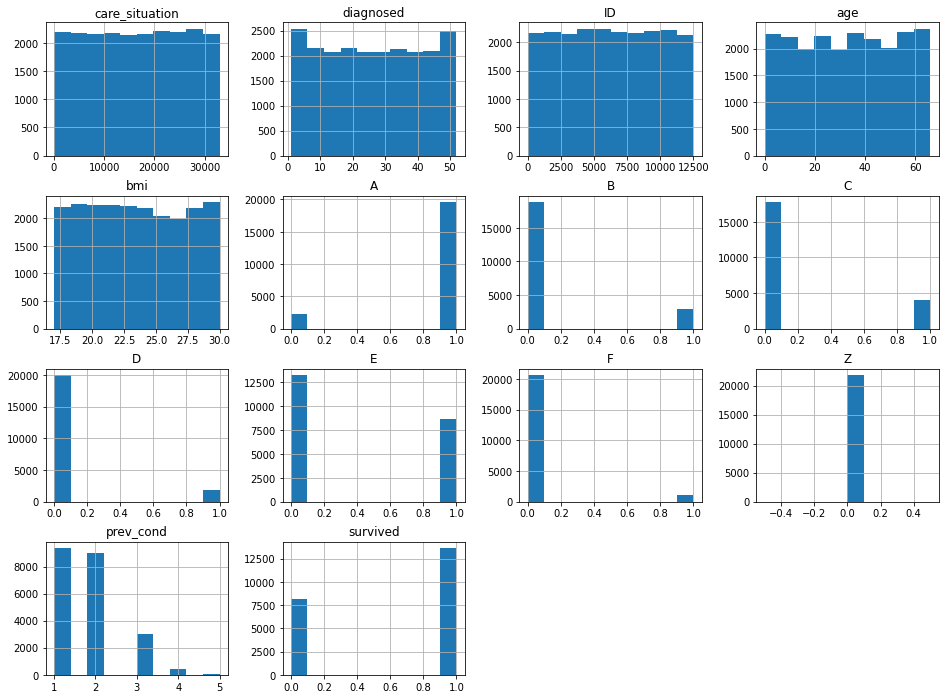

In [ ]:
blu.hist(bins=10, figsize=(16,12))
plt.show()

In [ ]:
print('% of smokers that survived', round(100*np.mean(blu['survived'][blu['smoker'] == 'YES']), 2))
print('% of non-smokers that survived', round(100*np.mean(blu['survived'][blu['smoker'] == 'NO']), 2))

% of smokers that survived 48.21
% of non-smokers that survived 73.04


More of the non-smokers survived than smokers

In [ ]:
print('% of urban residents who survived', round(100*np.mean(blu['survived'][blu['residence'] == 'URBAN']), 2))
print('% of rural residents who survived', round(100*np.mean(blu['survived'][blu['residence'] == 'RURAL']), 2))

% of urban residents who survived 54.22
% of rural residents who survived 65.97


More of the rural residents survived than the urban residents

In [ ]:
print('% of children who survived', round(100*np.mean(blu['survived'][blu['age'] < 18]), 2))
print('% of adults who survived', round(100*np.mean(blu['survived'][blu['age'] > 18]), 2))

% of children who survived 65.6
% of adults who survived 61.19


A slightly higher percentage survived among children than among adults.

The categorical columns will converted to numerical values to prepare the data for the model.

If a patient is a smoker, they get the value of 1 in the smoker column, if not, then 0.

If the patient's residence is rural, they get a value of 0, if it is urban, then it gets a value of 1

In [ ]:
blu.smoker = blu.smoker.apply(lambda x: 1 if x == 'YES' else 0)
blu.residence = blu.residence.apply(lambda x: 1 if x == 'URBAN' else 0)
blu.head()

,care_situation,diagnosed,ID,drug_class,age,bmi,smoker,residence,mental_condition,A,B,C,D,E,F,Z,prev_cond,survived
0,22374,8,3333,DX6,56,18.479385,1,1,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,1,0,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,1,0,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,0,1,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,10808,45,7977,DX6,47,26.155120,1,1,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [ ]:
blu2 = blu
blu2.head()

,care_situation,diagnosed,ID,drug_class,age,bmi,smoker,residence,mental_condition,A,B,C,D,E,F,Z,prev_cond,survived
0,22374,8,3333,DX6,56,18.479385,1,1,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,1,0,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,1,0,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,0,1,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,10808,45,7977,DX6,47,26.155120,1,1,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


The mental condition and Z columns are dropped because they have same value all through, as such would not be valuable in model training.

In [ ]:
blu2 = blu2.drop(['mental_condition','Z'], axis = 1)
blu2.head()

,care_situation,diagnosed,ID,drug_class,age,bmi,smoker,residence,A,B,C,D,E,F,prev_cond,survived
0,22374,8,3333,DX6,56,18.479385,1,1,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,10808,45,7977,DX6,47,26.155120,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0


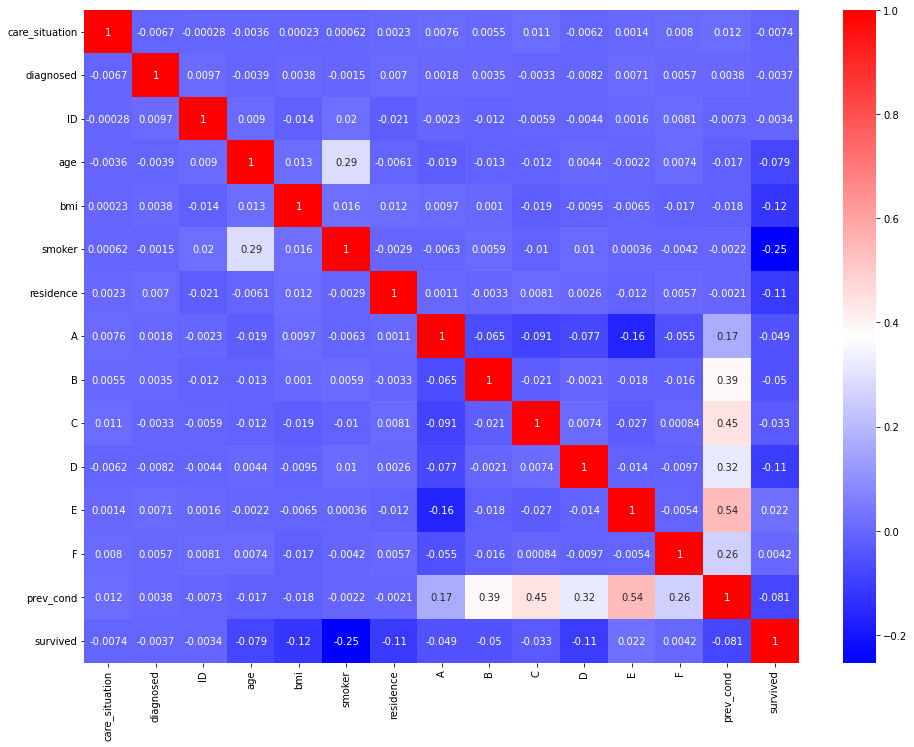

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(blu2.corr(), cmap='bwr', annot=True)

From the correlation analysis, it was observed that smoker, bmi, residence, prev_cond and age have the highest correlation with survival

In [ ]:
drugs = blu2.drug_class.str.get_dummies(sep=' ') # split all the entries separated by space and create dummy variables
drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,0,1


Here, we create dummy variables which truncates the numerous drug classes into the six drug classes instead of numerous columns for the different combinations.

In [ ]:
blu3 = pd.concat((blu2, drugs), axis=1)
blu3.head()

,care_situation,diagnosed,ID,drug_class,age,bmi,smoker,residence,A,B,...,E,F,prev_cond,survived,DX1,DX2,DX3,DX4,DX5,DX6
0,22374,8,3333,DX6,56,18.479385,1,1,1.0,0.0,...,1.0,0.0,2.0,0,0,0,0,0,0,1
1,18164,5,5740,DX2,36,22.945566,1,0,1.0,0.0,...,0.0,0.0,1.0,1,0,1,0,0,0,0
2,6283,23,10446,DX6,48,27.510027,1,0,1.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1
3,5339,51,12011,DX1,5,19.130976,0,1,1.0,0.0,...,0.0,0.0,1.0,1,1,0,0,0,0,0
4,10808,45,7977,DX6,47,26.155120,1,1,1.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,0,1


In [ ]:
blu3.loc[21839]

care_situation         4527
diagnosed                24
ID                     7809
drug_class         DX2 DX5 
age                      31
bmi               27.588608
smoker                    1
residence                 1
A                       1.0
B                       0.0
C                       0.0
D                       0.0
E                       0.0
F                       0.0
prev_cond               1.0
survived                  0
DX1                       0
DX2                       1
DX3                       0
DX4                       0
DX5                       1
DX6                       0
Name: 21839, dtype: object

Taking a look ar row 21839 where we have a combination of drug classes DX2 and DX5, we see how it is displayed.

In [ ]:
blu3 = blu3.drop(['care_situation', 'ID', 'drug_class'], axis = 1)
blu3.head()

,diagnosed,age,bmi,smoker,residence,A,B,C,D,E,F,prev_cond,survived,DX1,DX2,DX3,DX4,DX5,DX6
0,8,56,18.479385,1,1,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0,0,0,0,0,0,1
1,5,36,22.945566,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,0,0,0
2,23,48,27.510027,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1
3,51,5,19.130976,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0
4,45,47,26.155120,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1


Now, we split the data into Input and Target Variables, and then split further into train and test sets

In [ ]:
X = blu3.drop(['survived'], axis=1) # input variables
y = blu3[['survived']] # target variable i.e survived after year 1

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47)

# Using RandomForest Model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


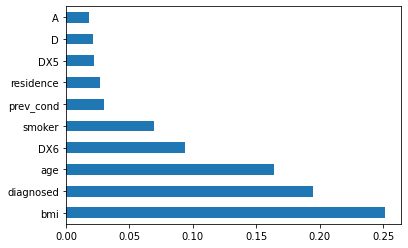

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model_base = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)
rf_model_base.fit(X_train,y_train)

# To show visualization of feature importance

feat_importances = pd.Series(rf_model_base.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

# This selects features based on the importance score
rf_sfm = SelectFromModel(rf_model_base)

rf_sfm = rf_sfm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [ ]:
# Data is transformed to create a new dataset containing only the most important features
X_important_train = rf_sfm.transform(X_train)
X_important_test = rf_sfm.transform(X_test)

In [ ]:
# A new random forest classifier is created for the most important features
rfc_important = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)

rfc_important = rfc_important.fit(X_important_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = rf_model_base.predict(X_test)

rf_ac = accuracy_score(y_test, y_pred) # Calculating accuracy score on test data
rf_fscore = f1_score(y_test, y_pred) # Calculating F1 score on test data

print("Baseline Model Accuracy:", rf_ac)
print("Baseline Model F1 Score:", rf_fscore)

Baseline Model Accuracy: 0.8169463319927888
Baseline Model F1 Score: 0.8571737719108419


In [ ]:
# Applying the full featured classifier to the test data
y_important_pred = rfc_important.predict(X_important_test)

rf_imp_ac = accuracy_score(y_test, y_important_pred) # Calculating accuracy score on test data
rf_imp_fscore = f1_score(y_test, y_important_pred) # Calculating F1 score on test data

print("Adjusted Features Model Accuracy:", rf_imp_ac)
print("Adjusted Features Model F1 Score:", rf_imp_fscore)

Adjusted Features Model Accuracy: 0.7754819026487311
Adjusted Features Model F1 Score: 0.8240791046397913


Here, we settle for the baseline model since it has the higher f1 score of 0.857

# Using XGBoost Model

In [ ]:
#!pip install xgboost

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature Importances :  [0.05923476 0.0561434  0.07583299 0.09133741 0.05702041 0.05232633
 0.01926855 0.1854891  0.0454984  0.01804682 0.         0.02187108
 0.02508232 0.00690798 0.02779208 0.03808508 0.04082295 0.17924038]


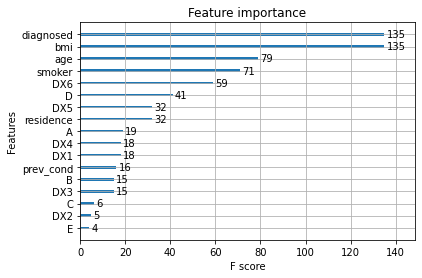

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(X_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

In [ ]:
selection = SelectFromModel(xgb_model)
selection.fit(X_train, y_train)

# Transforming the train and test features
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)

# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

XGBClassifier()

In [ ]:
y_pred = xgb_model.predict(X_test)

xgb_ac = accuracy_score(y_test, y_pred)
xgb_fscore = f1_score(y_test, y_pred)

print("XGB Baseline Model Accuracy:", xgb_ac)
print("XGB Baseline Model F1 Score:", xgb_fscore)

XGB Baseline Model Accuracy: 0.8348356677298572
XGB Baseline Model F1 Score: 0.8724429688336723


In [ ]:
# Evaluating the model
predictions = selection_model.predict(select_X_test) # predict for selected features of X_test
xgb_accuracy = accuracy_score(y_test, predictions) # Calculating accuracy score on test data
xgb_fscore = f1_score(y_test, predictions) # Calculating F1 score on test data

print("Adjusted Features XGBoost Model Accuracy:", xgb_accuracy)
print("Adjusted Features XGBoost Model F1 Score:", xgb_fscore)

Adjusted Features XGBoost Model Accuracy: 0.8083483566772985
Adjusted Features XGBoost Model F1 Score: 0.8527907967618237


Here, we settle for the baseline model since it has the higher fi score of 0.872

# Hyper Parameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 1000]}

In [ ]:
hpt = XGBClassifier(random_state = 1)

# Grid search cv
grid_search = GridSearchCV(estimator = hpt, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, estimator=XGBClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'n_estimators': [500, 1000]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 5, 'n_estimators': 500}

In [ ]:
pred = grid_search.predict(X_test)

In [ ]:
f1_score(y_test, pred)

0.8725919439579685

After the hyperparameter tuning, there is almost no imporovement on the XGBoost baseline model. Hence, the XGBoost is used anyways on the test data

# Model Prediction

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [ ]:
test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


The test data is prepared the same way as the train data, renaming columns, dropping unneeded columns and removing/replacing NaN

In [ ]:
test_data.columns = ['care_situation', 'diagnosed', 'ID', 'drug_class', 'age', 'bmi', 'smoker', 'residence', 'mental_condition', 'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'prev_cond']
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   care_situation    9303 non-null   int64  
 1   diagnosed         9303 non-null   int64  
 2   ID                9303 non-null   int64  
 3   drug_class        9303 non-null   object 
 4   age               9303 non-null   int64  
 5   bmi               9303 non-null   float64
 6   smoker            9303 non-null   object 
 7   residence         9303 non-null   object 
 8   mental_condition  9303 non-null   object 
 9   A                 9303 non-null   float64
 10  B                 9303 non-null   float64
 11  C                 9303 non-null   float64
 12  D                 9303 non-null   float64
 13  E                 9303 non-null   float64
 14  F                 9303 non-null   float64
 15  Z                 9303 non-null   float64
 16  prev_cond         9303 non-null   float64


In [ ]:
test_data.describe()

,care_situation,diagnosed,ID,age,bmi,A,B,C,D,E,F,Z,prev_cond
count,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.0,9303.000000
mean,16392.542943,26.680426,6226.311620,33.249059,23.429321,0.893260,0.142320,0.183167,0.087284,0.399441,0.052886,0.0,1.758358
std,9531.750578,15.097842,3634.312461,19.477920,3.769305,0.308799,0.349396,0.386824,0.282265,0.489810,0.223818,0.0,0.771230
min,1.000000,1.000000,3.000000,0.000000,17.000695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,8133.000000,14.000000,3073.500000,17.000000,20.166849,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,16281.000000,27.000000,6246.000000,33.000000,23.392495,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000
75%,24588.500000,40.000000,9424.000000,50.000000,26.726929,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,2.000000
max,32975.000000,52.000000,12500.000000,66.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,5.000000


In [ ]:
# Inspecting the values counts of the categorical columns
cat_cols = ['drug_class', 'smoker', 'residence', 'mental_condition', 'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'prev_cond']
for cat in cat_cols:
  print(test_data[cat].value_counts())
  print('')

DX6                     3462
DX4                      785
DX5                      782
DX1                      753
DX3                      747
DX2                      745
DX2 DX4                  181
DX2 DX3                  179
DX1 DX5                  166
DX2 DX5                  165
DX3 DX5                  161
DX1 DX2                  160
DX4 DX5                  157
DX1 DX4                  153
DX1 DX3                  152
DX3 DX4                  148
DX1 DX3 DX4               41
DX1 DX2 DX5               41
DX2 DX3 DX4               40
DX1 DX2 DX3               40
DX3 DX4 DX5               40
DX1 DX2 DX4               38
DX2 DX3 DX5               37
DX1 DX4 DX5               34
DX2 DX4 DX5               33
DX1 DX3 DX5               23
DX1 DX3 DX4 DX5           11
DX2 DX3 DX4 DX5            8
DX1 DX2 DX4 DX5            8
DX1 DX2 DX3 DX5            6
DX1 DX2 DX3 DX4            5
DX1 DX2 DX3 DX4 DX5        2
Name: drug_class, dtype: int64

NO     5333
YES    3970
Name: smoker, dt

In [ ]:
test_data.isnull().sum()

care_situation      0
diagnosed           0
ID                  0
drug_class          0
age                 0
bmi                 0
smoker              0
residence           0
mental_condition    0
A                   0
B                   0
C                   0
D                   0
E                   0
F                   0
Z                   0
prev_cond           0
dtype: int64

In [ ]:
test_data.smoker = test_data.smoker.apply(lambda x: 1 if x == 'YES' else 0)
test_data.residence = test_data.residence.apply(lambda x: 1 if x == 'URBAN' else 0)
test_data.head()

,care_situation,diagnosed,ID,drug_class,age,bmi,smoker,residence,mental_condition,A,B,C,D,E,F,Z,prev_cond
0,19150,40,3709,DX3,16,29.443894,0,0,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,0,1,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,0,0,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,0,1,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,0,0,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
test_data = test_data.drop(['mental_condition','Z'], axis = 1)
test_data.head()

,care_situation,diagnosed,ID,drug_class,age,bmi,smoker,residence,A,B,C,D,E,F,prev_cond
0,19150,40,3709,DX3,16,29.443894,0,0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,0,1,1.0,1.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,0,0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,0,1,1.0,0.0,1.0,0.0,1.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
test_drugs = test_data.drug_class.str.get_dummies(sep=' ') # split all the entries separated by space and create dummy variables
test_drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,0,1,1,0
3,0,0,0,0,0,1
4,0,0,1,0,0,0


In [ ]:
test_data2 = pd.concat((test_data, test_drugs), axis=1)
test_data2.head()

,care_situation,diagnosed,ID,drug_class,age,bmi,smoker,residence,A,B,...,D,E,F,prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
0,19150,40,3709,DX3,16,29.443894,0,0,1.0,0.0,...,0.0,1.0,0.0,2.0,0,0,1,0,0,0
1,23216,52,986,DX6,24,26.836321,0,1,1.0,1.0,...,0.0,0.0,0.0,2.0,0,0,0,0,0,1
2,11890,50,11821,DX4 DX5,63,25.523280,0,0,1.0,0.0,...,0.0,1.0,0.0,2.0,0,0,0,1,1,0
3,7149,32,3292,DX6,42,27.171155,0,1,1.0,0.0,...,0.0,1.0,0.0,3.0,0,0,0,0,0,1
4,22845,20,9959,DX3,50,25.556192,0,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0,0,1,0,0,0


In [ ]:
test_data2 = test_data2.drop(['care_situation', 'ID', 'drug_class'], axis = 1)
test_data2.head()

,diagnosed,age,bmi,smoker,residence,A,B,C,D,E,F,prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
0,40,16,29.443894,0,0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0,0,1,0,0,0
1,52,24,26.836321,0,1,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,1
2,50,63,25.523280,0,0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0,0,0,1,1,0
3,32,42,27.171155,0,1,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0,0,0,0,0,1
4,20,50,25.556192,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0


From the two model tested:

RandomForest gave an f1 score of 0.857

XGBoost gave an f1 score of 0.872

So, we use the XGBoost model on the test data

In [ ]:
y_pred_test = xgb_model.predict(test_data2)

In [ ]:
y_pred_test

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
df = pd.DataFrame(y_pred_test)
df.columns = ['prediction']
#df.to_csv('test_data_pred.csv')

In [ ]:
df.head()

,prediction
0,1
1,1
2,1
3,0
4,1
